### Prepare phenoype for subtype analysis : Social task

- Build a scrubbing file to be used on subtype analysis for social task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = "~/Drive/HCP/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [4]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("socRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess2_socRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("socLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess2_socLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949,HCP100206
22,HCP100307_sess2_socRL,0.0,274.0,0.098119,0.098119,HCP100307
36,HCP100408_sess2_socRL,0.0,274.0,0.103292,0.103292,HCP100408
50,HCP100610_sess2_socRL,0.0,274.0,0.179657,0.179657,HCP100610
64,HCP101006_sess2_socRL,0.0,274.0,0.145925,0.145925,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656,HCP100206
23,HCP100307_sess2_socLR,0.0,274.0,0.087372,0.087372,HCP100307
37,HCP100408_sess2_socLR,0.0,274.0,0.135210,0.135210,HCP100408
51,HCP100610_sess2_socLR,0.0,274.0,0.189551,0.189551,HCP100610
65,HCP101006_sess2_socLR,0.0,274.0,0.124287,0.124287,HCP101006


In [5]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
8,HCP100206_sess2_socRL,0.084949,0.084949,HCP100206
22,HCP100307_sess2_socRL,0.098119,0.098119,HCP100307
36,HCP100408_sess2_socRL,0.103292,0.103292,HCP100408
50,HCP100610_sess2_socRL,0.179657,0.179657,HCP100610
64,HCP101006_sess2_socRL,0.145925,0.145925,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
9,HCP100206_sess2_socLR,0.096656,0.096656,HCP100206
23,HCP100307_sess2_socLR,0.087372,0.087372,HCP100307
37,HCP100408_sess2_socLR,0.135210,0.135210,HCP100408
51,HCP100610_sess2_socLR,0.189551,0.189551,HCP100610
65,HCP101006_sess2_socLR,0.124287,0.124287,HCP101006


In [6]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [7]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess2_socRL,0.084949,0.084949,HCP100206,HCP100206_sess2_socLR,0.096656,0.096656
1,HCP100307_sess2_socRL,0.098119,0.098119,HCP100307,HCP100307_sess2_socLR,0.087372,0.087372
2,HCP100408_sess2_socRL,0.103292,0.103292,HCP100408,HCP100408_sess2_socLR,0.135210,0.135210
3,HCP100610_sess2_socRL,0.179657,0.179657,HCP100610,HCP100610_sess2_socLR,0.189551,0.189551
4,HCP101006_sess2_socRL,0.145925,0.145925,HCP101006,HCP101006_sess2_socLR,0.124287,0.124287


In [8]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [9]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.084949,0.084949,0.096656,0.096656
1,HCP100307,0.098119,0.098119,0.087372,0.087372
2,HCP100408,0.103292,0.103292,0.135210,0.135210
3,HCP100610,0.179657,0.179657,0.189551,0.189551
4,HCP101006,0.145925,0.145925,0.124287,0.124287


In [10]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_social.csv"), index=False)

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.084949,0.084949,0.096656,0.096656,0.090803,0.090803
1,HCP100307,0.098119,0.098119,0.087372,0.087372,0.092746,0.092746
2,HCP100408,0.103292,0.103292,0.135210,0.135210,0.119251,0.119251
3,HCP100610,0.179657,0.179657,0.189551,0.189551,0.184604,0.184604
4,HCP101006,0.145925,0.145925,0.124287,0.124287,0.135106,0.135106


In [12]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,835.000000,835.000000,834.000000,834.000000,835.000000,835.000000
mean,0.134756,0.125140,0.140567,0.127330,0.126217,0.137636
std,0.045537,0.035198,0.063478,0.035663,0.034533,0.049950
min,0.059717,0.059717,0.065582,0.065582,0.062650,0.062650
25%,0.101843,0.100033,0.103591,0.101704,0.101486,0.104003
50%,0.125374,0.118517,0.127743,0.121271,0.120470,0.127190
75%,0.155663,0.143964,0.161005,0.146285,0.143721,0.157626
max,0.473029,0.294591,1.225426,0.278205,0.286398,0.685102


In [13]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

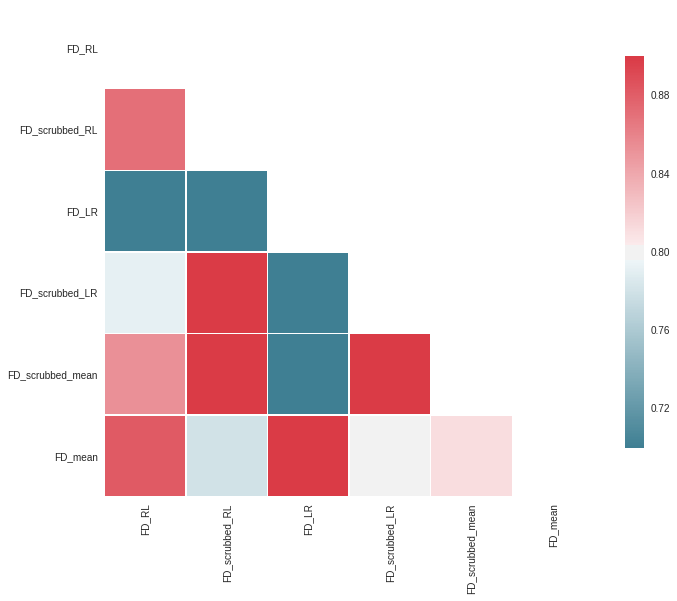

In [14]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

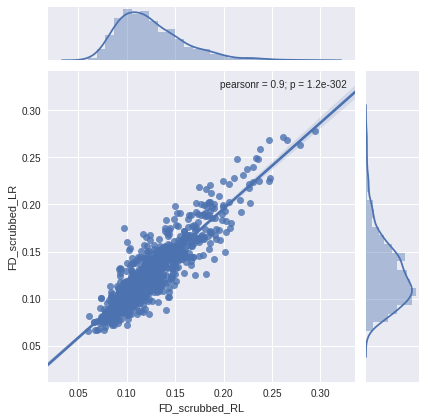

In [15]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

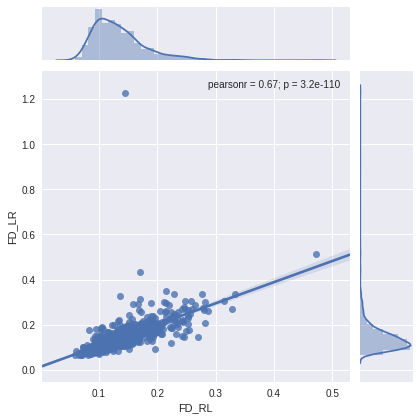

In [16]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [17]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [18]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Handedness','Twin_Stat','Zygosity','Mother_ID','BMI']],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Handedness,Twin_Stat,Zygosity,Mother_ID,BMI,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100004,24,M,95,NotTwin,NotTwin,52259,25.49,-1.052260,-0.536775,1.187782,-0.657450,-0.098656,-0.279903,0.608886,-1.532028,0.209060
1,HCP100206,27,M,65,NotTwin,NotTwin,56037,26.64,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
2,HCP100307,27,F,95,Twin,NotMZ,51488,22.96,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
3,HCP100408,33,M,55,Twin,MZ,51730,27.75,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
4,HCP100610,27,M,85,Twin,NotMZ,52813,36.91,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399


In [19]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [20]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject       932
Age_in_Yrs    932
Gender        932
Handedness    932
Twin_Stat     932
Zygosity      932
Mother_ID     932
BMI           932
cluster_1     932
cluster_2     932
cluster_3     932
cluster_4     932
cluster_5     932
cluster_6     932
cluster_7     932
cluster_8     932
cluster_9     932
dtype: int64

In [21]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.4/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Handedness,Twin_Stat,Zygosity,Mother_ID,BMI,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100004,24,1,95,NotTwin,NotTwin,52259,25.49,-1.052260,-0.536775,1.187782,-0.657450,-0.098656,-0.279903,0.608886,-1.532028,0.209060
1,HCP100206,27,1,65,NotTwin,NotTwin,56037,26.64,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
2,HCP100307,27,2,95,Twin,NotMZ,51488,22.96,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
3,HCP100408,33,1,55,Twin,MZ,51730,27.75,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
4,HCP100610,27,1,85,Twin,NotMZ,52813,36.91,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399


In [23]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [24]:
merged_pheno_scrub.count()

                    835
FD_RL               835
FD_scrubbed_RL      835
FD_LR               834
FD_scrubbed_LR      834
FD_scrubbed_mean    835
FD_mean             835
Subject             809
Age_in_Yrs          809
Gender              809
Handedness          809
Twin_Stat           809
Zygosity            809
Mother_ID           809
BMI                 809
cluster_1           809
cluster_2           809
cluster_3           809
cluster_4           809
cluster_5           809
cluster_6           809
cluster_7           809
cluster_8           809
cluster_9           809
dtype: int64

In [25]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [26]:
merged_pheno_scrub_clean.count()

                    808
FD_RL               808
FD_scrubbed_RL      808
FD_LR               808
FD_scrubbed_LR      808
FD_scrubbed_mean    808
FD_mean             808
Subject             808
Age_in_Yrs          808
Gender              808
Handedness          808
Twin_Stat           808
Zygosity            808
Mother_ID           808
BMI                 808
cluster_1           808
cluster_2           808
cluster_3           808
cluster_4           808
cluster_5           808
cluster_6           808
cluster_7           808
cluster_8           808
cluster_9           808
dtype: int64

In [27]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BMI,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100206,0.084949,0.084949,0.096656,0.096656,0.090803,0.090803,HCP100206,27.0,1.0,...,26.64,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
1,HCP100307,0.098119,0.098119,0.087372,0.087372,0.092746,0.092746,HCP100307,27.0,2.0,...,22.96,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
2,HCP100408,0.103292,0.103292,0.135210,0.135210,0.119251,0.119251,HCP100408,33.0,1.0,...,27.75,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
3,HCP100610,0.179657,0.179657,0.189551,0.189551,0.184604,0.184604,HCP100610,27.0,1.0,...,36.91,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399
4,HCP101006,0.145925,0.145925,0.124287,0.124287,0.135106,0.135106,HCP101006,35.0,2.0,...,30.27,0.591952,-1.191472,0.037988,-0.682910,-0.516141,0.056823,-0.275139,-0.310782,0.308365
5,HCP101107,0.158628,0.085494,0.120437,0.098313,0.091904,0.139532,HCP101107,22.0,1.0,...,21.13,-0.236587,-0.055247,0.202737,0.108271,-0.816365,0.164527,1.259271,0.350204,0.123138
6,HCP101309,0.073253,0.073253,0.100585,0.100585,0.086919,0.086919,HCP101309,29.0,1.0,...,22.20,2.460648,-0.639590,-1.056096,-0.458966,-0.579394,-0.306816,-0.491635,0.396082,-0.336725
7,HCP101410,0.126335,0.126335,0.142029,0.142029,0.134182,0.134182,HCP101410,29.0,1.0,...,24.27,-0.737608,-0.286803,-0.213357,0.012024,-0.830777,-0.408648,0.020646,0.388261,0.779067
8,HCP101915,0.101388,0.101388,0.112228,0.112228,0.106808,0.106808,HCP101915,35.0,2.0,...,20.42,1.461551,-1.096840,-0.838275,1.016038,0.083408,-0.056452,0.159738,1.173397,-0.532920
9,HCP102008,0.159901,0.159901,0.165341,0.165341,0.162621,0.162621,HCP102008,24.0,1.0,...,31.42,-0.891228,0.787911,-0.101854,0.511281,0.198667,0.152497,-0.006320,0.653874,0.721998


In [28]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_social_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_social.csv"), index=False)